In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import

In [0]:
import pandas as pd
import numpy as np
from pprint import pprint
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import time
from _operator import itemgetter
from math import sqrt
import random 
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
path="drive/My Drive/1001_project_Total/Data/"
df1=pd.read_csv(path+"20170101_sknn.csv")

In [4]:
df=df1.drop("Unnamed: 0",1)
df.columns

Index(['profile', 'category1', 'canonicalUrl', 'referrerHostClass',
       'sessionStop', 'userId', 'publishtime', 'sessionStart', 'referrerUrl',
       'keywords', 'id', 'eventId', 'city', 'title', 'url', 'country',
       'region', 'author', 'referrerSearchEngine', 'deviceType', 'time', 'os',
       'activeTime', 'sessionNo', 'activeTotalTime', 'category_num'],
      dtype='object')

In [5]:
print(len(df))
print(len(df["city"].unique()))
print(len(df["region"].unique()))

252990
1861
453


# Choose Variables

In [38]:
articles=df["id"].unique()
d={}
for i in range(len(articles)):
    article=articles[i]
    d[article]=i
df["articleId"]=df["id"].map(d)
df.columns

Index(['profile', 'category1', 'canonicalUrl', 'referrerHostClass',
       'sessionStop', 'userId', 'publishtime', 'sessionStart', 'referrerUrl',
       'keywords', 'id', 'eventId', 'city', 'title', 'url', 'country',
       'region', 'author', 'referrerSearchEngine', 'deviceType', 'time', 'os',
       'activeTime', 'sessionNo', 'activeTotalTime', 'category_num',
       'articleId', 'categoryId'],
      dtype='object')

In [39]:
#data=df[["sessionNo","category_num","time"]].rename(columns={"sessionNo":"session_key","category_num": "item_key", "time":"time_key"})
data_1=df[["sessionNo","articleId","time","city","region","deviceType"]].rename(columns={"sessionNo":"session_key","articleId": "item_key", "time":"time_key"})
print("The length of data with article as itemid: ",len(data_1))
data_1.head()

The length of data with article as itemid:  252990


,session_key,item_key,time_key,city,region,deviceType
0,1,0,1483305738,oslo,oslo,Desktop
1,2,1,1483260265,brumunddal,hedmark,Desktop
2,3,2,1483271454,brumunddal,hedmark,Desktop
3,4,0,1483302497,brumunddal,hedmark,Desktop
4,6,0,1483309277,trondheim,sor-trondelag,Tablet


In [79]:
k=df.groupby(["id"]).size()
k1=data_1.groupby(["item_key"]).size()
print(18116/len(data_2))
print(k.sort_values(ascending=False)[:20])
print(k1.sort_values(ascending=False)[:20])

0.07160757342187438
id
71e7c18e889b7e19352cfb63a15bd8aa32c51630    23616
68d1503c73ad169dcfff48214fd0274c4d612e63    21071
b16b516eefb647edec256ad2f9b2c7a897b9785b    18116
ca1952721582ff9e2b6d3555c26ee81a3f3f8fdb    16105
2f467692114ca904797b884155dc0d423b5d9c42    12334
f2ce698b3daf00cfcac0d5279053c4da9de07a92    11416
0867dbb33bb90970ae48592057be34246a0124ac    10838
f9ad33b317728440d5ed10efce23ccfbb81e9c70    10397
e1f0d81ed8ccb738db28fdfaa51ad3a6b3fc2b8e     9796
7dbbd7f3a7ec287bdcbdaf8b8f042732074bf2bd     8522
197fa137aae522a87d6bd210610bc2c71191d5fa     8499
b28e7c163c39941aa1cbd0b7b3a821576771f893     8277
ab8cd0aafcfee80d596f4d4fccf5ea1083ef26d2     6987
b5805afe6f42ea5da09270c7184be7a7c4cd8c34     6870
3a77a5a627c60c02d40440ea394cb8afb2791862     6845
dccdcc4b672df99eabf2dbbfc350c9917dee9a0b     6776
05e4209b296dc7dfc9d4e0c401d79256bcea4cb5     6375
1d6279f9e08156802519de2929346fd57e974ff1     4877
2a00c43cf84f7c433431027845505a0fdc77a55d     3732
a02dc58701d0a51ec7717261846

In [77]:
df[df["id"]=="f9ad33b317728440d5ed10efce23ccfbb81e9c70"]["keywords"]

25        Tour de ski,Meråker,Martin Johnsrud Sundby
51        Tour de ski,Meråker,Martin Johnsrud Sundby
78        Tour de ski,Meråker,Martin Johnsrud Sundby
122       Tour de ski,Meråker,Martin Johnsrud Sundby
156       Tour de ski,Meråker,Martin Johnsrud Sundby
                             ...                    
252889    Tour de ski,Meråker,Martin Johnsrud Sundby
252897    Tour de ski,Meråker,Martin Johnsrud Sundby
252925    Tour de ski,Meråker,Martin Johnsrud Sundby
252973    Tour de ski,Meråker,Martin Johnsrud Sundby
252981    Tour de ski,Meråker,Martin Johnsrud Sundby
Name: keywords, Length: 10397, dtype: object

In [0]:
categories=df["category1"].unique()
d={}
for i in range(len(categories)):
    category=categories[i]
    d[category]=i
df["categoryId"]=df["category1"].map(d)

In [33]:
#data=df[["sessionNo","category_num","time"]].rename(columns={"sessionNo":"session_key","category_num": "item_key", "time":"time_key"})
data_2=df[["sessionNo","categoryId","time","city","region","deviceType"]].rename(columns={"sessionNo":"session_key","categoryId": "item_key", "time":"time_key"})
print("The length of data with category as itemid: ",len(data_2))
data_2.head()

The length of data with category as itemid:  252990


,session_key,item_key,time_key,city,region,deviceType
0,1,0,1483305738,oslo,oslo,Desktop
1,2,0,1483260265,brumunddal,hedmark,Desktop
2,3,1,1483271454,brumunddal,hedmark,Desktop
3,4,0,1483302497,brumunddal,hedmark,Desktop
4,6,0,1483309277,trondheim,sor-trondelag,Tablet


## DeviceType

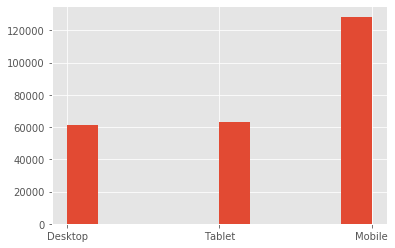

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
fig=plt.hist(data_1["deviceType"])

In [0]:
t=pd.get_dummies(data_1["deviceType"])
device_data=data_1.join(t)
device_data.to_csv(path+"day_one_article_only_device.csv")
device_data.head()

,session_key,item_key,time_key,city,region,deviceType,Desktop,Mobile,Tablet
0,1,0,1483305738,oslo,oslo,Desktop,1,0,0
1,2,1,1483260265,brumunddal,hedmark,Desktop,1,0,0
2,3,2,1483271454,brumunddal,hedmark,Desktop,1,0,0
3,4,0,1483302497,brumunddal,hedmark,Desktop,1,0,0
4,6,0,1483309277,trondheim,sor-trondelag,Tablet,0,0,1


In [0]:
t=pd.get_dummies(data_2["deviceType"])
device_data=data_2.join(t)
device_data.to_csv(path+"day_one_category_only_device.csv")
device_data.head()

,session_key,item_key,time_key,city,region,deviceType,Desktop,Mobile,Tablet
0,1,0,1483305738,oslo,oslo,Desktop,1,0,0
1,2,0,1483260265,brumunddal,hedmark,Desktop,1,0,0
2,3,1,1483271454,brumunddal,hedmark,Desktop,1,0,0
3,4,0,1483302497,brumunddal,hedmark,Desktop,1,0,0
4,6,0,1483309277,trondheim,sor-trondelag,Tablet,0,0,1


## Regions

In [0]:
k=data_1.groupby("region")["session_key"].count()
k.describe()

count       666.000000
mean       1897.102102
std       30195.367486
min           1.000000
25%           3.000000
50%           9.000000
75%          31.000000
max      744327.000000
Name: session_key, dtype: float64

In [0]:
from geopy.geocoders import Nominatim
from tqdm import tqdm
geolocator = Nominatim(user_agent="specify_your_app_name_here")
d={}
k=data_1["region"].unique()
for i in tqdm(range(len(k))):
    try:
      location = geolocator.geocode(i)
      if not location:
          d[k[i]]=(0,0)
      else:
          d[k[i]]=(location.latitude, location.longitude)
    except:
      print(111)
      d[k[i]]=(0,0)

  3%|▎         | 19/667 [00:14<06:35,  1.64it/s]

111


 40%|████      | 268/667 [02:20<03:05,  2.15it/s]

In [0]:
l=[[],[]]
for v,k in zip(d.values(),d.keys()):
  if d[k]!=(0,0):
    l[0].append(d[k][0])
    l[1].append(d[k][1])
mean=(sum(l[0])/len(l[0]),sum(l[1])/len(l[1]))
for v,k in zip(d.values(),d.keys()):
  if d[k]==(0,0):
    d[k]=mean

In [0]:
tmp=data_1["region"].map(d)
region_data=data_1
region_data["lat"]=tmp.apply(lambda x:x[0])
region_data["long"]=tmp.apply(lambda x:x[1])
region_data.to_csv(path+"day_one_article_only_region.csv")
region_data.head()

,session_key,item_key,time_key,city,region,deviceType,lat,long
0,1,0,1483305738,oslo,oslo,Desktop,47.226057,28.307166
1,2,1,1483260265,brumunddal,hedmark,Desktop,22.351115,78.667743
2,3,2,1483271454,brumunddal,hedmark,Desktop,22.351115,78.667743
3,4,0,1483302497,brumunddal,hedmark,Desktop,22.351115,78.667743
4,6,0,1483309277,trondheim,sor-trondelag,Tablet,34.563019,133.685164


In [0]:
tmp=data_2["region"].map(d)
region_data=data_2
region_data["lat"]=tmp.apply(lambda x:x[0])
region_data["long"]=tmp.apply(lambda x:x[1])
region_data.to_csv(path+"day_one_category_only_region.csv")
region_data.head()

,session_key,item_key,time_key,city,region,deviceType,lat,long
0,1,0,1483305738,oslo,oslo,Desktop,47.226057,28.307166
1,2,0,1483260265,brumunddal,hedmark,Desktop,22.351115,78.667743
2,3,1,1483271454,brumunddal,hedmark,Desktop,22.351115,78.667743
3,4,0,1483302497,brumunddal,hedmark,Desktop,22.351115,78.667743
4,6,0,1483309277,trondheim,sor-trondelag,Tablet,34.563019,133.685164


## Combine

In [0]:
region=pd.read_csv(path+"day_one_article_only_region.csv")
device=pd.read_csv(path+"day_one_article_only_device.csv")
region.head(),device.head()

(   Unnamed: 0  session_key  item_key  ...  deviceType        lat        long
 0           0            1         0  ...     Desktop  47.226057   28.307166
 1           1            2         1  ...     Desktop  22.351115   78.667743
 2           2            3         2  ...     Desktop  22.351115   78.667743
 3           3            4         0  ...     Desktop  22.351115   78.667743
 4           4            6         0  ...      Tablet  34.563019  133.685164
 
 [5 rows x 9 columns],
    Unnamed: 0  session_key  item_key  ...  Desktop Mobile Tablet
 0           0            1         0  ...        1      0      0
 1           1            2         1  ...        1      0      0
 2           2            3         2  ...        1      0      0
 3           3            4         0  ...        1      0      0
 4           4            6         0  ...        0      0      1
 
 [5 rows x 10 columns])

In [0]:
device=device[["Desktop","Mobile","Tablet"]]
combine=region.join(device)
combine.to_csv(path+"day_one_article_region_device.csv")
combine.head()

,Unnamed: 0,session_key,item_key,time_key,city,region,deviceType,lat,long,Desktop,Mobile,Tablet
0,0,1,0,1483305738,oslo,oslo,Desktop,47.226057,28.307166,1,0,0
1,1,2,1,1483260265,brumunddal,hedmark,Desktop,22.351115,78.667743,1,0,0
2,2,3,2,1483271454,brumunddal,hedmark,Desktop,22.351115,78.667743,1,0,0
3,3,4,0,1483302497,brumunddal,hedmark,Desktop,22.351115,78.667743,1,0,0
4,4,6,0,1483309277,trondheim,sor-trondelag,Tablet,34.563019,133.685164,0,0,1


In [0]:
region=pd.read_csv(path+"day_one_category_only_region.csv")
device=pd.read_csv(path+"day_one_category_only_device.csv")
region.head(),device.head()

(   Unnamed: 0  session_key  item_key  ...  deviceType        lat        long
 0           0            1         0  ...     Desktop  47.226057   28.307166
 1           1            2         0  ...     Desktop  22.351115   78.667743
 2           2            3         1  ...     Desktop  22.351115   78.667743
 3           3            4         0  ...     Desktop  22.351115   78.667743
 4           4            6         0  ...      Tablet  34.563019  133.685164
 
 [5 rows x 9 columns],
    Unnamed: 0  session_key  item_key  ...  Desktop Mobile Tablet
 0           0            1         0  ...        1      0      0
 1           1            2         0  ...        1      0      0
 2           2            3         1  ...        1      0      0
 3           3            4         0  ...        1      0      0
 4           4            6         0  ...        0      0      1
 
 [5 rows x 10 columns])

In [0]:
device=device[["Desktop","Mobile","Tablet"]]
combine=region.join(device)
combine.to_csv(path+"day_one_category_region_device.csv")
combine.head()

,Unnamed: 0,session_key,item_key,time_key,city,region,deviceType,lat,long,Desktop,Mobile,Tablet
0,0,1,0,1483305738,oslo,oslo,Desktop,47.226057,28.307166,1,0,0
1,1,2,0,1483260265,brumunddal,hedmark,Desktop,22.351115,78.667743,1,0,0
2,2,3,1,1483271454,brumunddal,hedmark,Desktop,22.351115,78.667743,1,0,0
3,3,4,0,1483302497,brumunddal,hedmark,Desktop,22.351115,78.667743,1,0,0
4,4,6,0,1483309277,trondheim,sor-trondelag,Tablet,34.563019,133.685164,0,0,1
